#Import Library dan Koneksi ke GDRIVE

In [1]:
from google.colab import drive
import pandas as pd
import os
import glob

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
import string
import re
import nltk
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
!pip install PySastrawi

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 12.2 MB/s eta 0:00:00


In [ ]:
# 2. Tentukan folder tempat menyimpan file CSV di Google Drive
folder_path = "/content/drive/MyDrive/Data Scraping"  # Ganti dengan path folder yang sesuai

# 3. Dapatkan daftar semua file CSV di folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# 4. Inisialisasi daftar untuk menyimpan DataFrame
df_list = []

# 5. Loop melalui semua file CSV dan baca datanya
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

# 6. Gabungkan semua DataFrame menjadi satu
df_combined = pd.concat(df_list, ignore_index=True)

# 7. Simpan dataset yang telah digabungkan kembali ke Google Drive
output_file = os.path.join(folder_path, "combined_dataset.csv")
df_combined.to_csv(output_file, index=False)

# 8. Tampilkan beberapa baris pertama dari dataset gabungan
df_combined.head()



,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1881757289931235453,Tue Jan 21 17:40:21 +0000 2025,0,7. Menjaga Kesehatan Janin Kandungan asam fola...,1881758748123025761,NaN,rabitsv,in,NaN,0,1,0,https://x.com/rabitsv/status/1881758748123025761,1616325242,rabitsv
1,1880292782528725224,Fri Jan 17 21:23:06 +0000 2025,1,@RezaRiz77678876 @strivxq Kmrn bilang ibu hami...,1880365254745682380,NaN,nnyyzz__,in,NaN,0,1,0,https://x.com/nnyyzz__/status/1880365254745682380,1623346560099827712,nnyyzz__
2,1880169933927280900,Fri Jan 17 08:28:14 +0000 2025,0,3. Tetap Aktif dengan Olahraga Ringan Olahraga...,1880170249917722662,NaN,Phytagorasi,in,"Las Vegas, NV",0,1,0,https://x.com/Phytagorasi/status/1880170249917...,870665658937163776,Phytagorasi
3,1880139295630975071,Fri Jan 17 07:36:45 +0000 2025,0,@tanyarlfes Sangat bisaa karena penyakit menta...,1880157293448409330,NaN,tanyarlfes,in,welcome to my playground,0,1,0,https://x.com/sneezygirl2/status/1880157293448...,1714823786137309184,sneezygirl2
4,1879818832795369665,Thu Jan 16 09:11:49 +0000 2025,3,udah sampe di fase nyuciin baju2 dek bayii mul...,1879818832795369665,NaN,NaN,in,earth,1,4,0,https://x.com/easyluckyme/status/1879818832795...,1796679374617673728,easyluckyme


In [3]:
df_combined = pd.read_csv('/content/drive/MyDrive/Data Scraping/combined_dataset.csv')

#EDA

In [ ]:
df_combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13889 entries, 0 to 13888
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      13889 non-null  int64 
 1   created_at               13889 non-null  object
 2   favorite_count           13889 non-null  int64 
 3   full_text                13889 non-null  object
 4   id_str                   13889 non-null  int64 
 5   image_url                737 non-null    object
 6   in_reply_to_screen_name  5056 non-null   object
 7   lang                     13889 non-null  object
 8   location                 8829 non-null   object
 9   quote_count              13889 non-null  int64 
 10  reply_count              13889 non-null  int64 
 11  retweet_count            13889 non-null  int64 
 12  tweet_url                13889 non-null  object
 13  user_id_str              13889 non-null  int64 
 14  username                 13889 non-nul

In [ ]:
# # Mendapatkan list kolom yang bertipe object (string)
# object_columns = df_combined.select_dtypes(include=['int64']).columns.tolist()

# # Menampilkan hasil
# print("Kolom bertipe object:", object_columns)


In [ ]:
df_combined['full_text'].duplicated().sum()

np.int64(2735)

In [ ]:
cats = ['created_at', 'full_text', 'image_url', 'in_reply_to_screen_name', 'lang', 'location', 'tweet_url', 'username']
nums = ['conversation_id_str', 'favorite_count', 'id_str', 'quote_count', 'reply_count', 'retweet_count', 'user_id_str']

In [ ]:
df_combined[cats].describe()

,created_at,full_text,image_url,in_reply_to_screen_name,lang,location,tweet_url,username
count,13889,13889,737,5056,13889,8829,13889,13889
unique,12338,11154,631,3151,3,3527,12963,9887
top,Mon Feb 23 13:18:34 +0000 2015,Makan junk food saat hamil berisiko melahirkan...,https://pbs.twimg.com/media/GFJRnwwbcAA18W9.jpg,tanyakanrl,in,Indonesia,https://x.com/riringkriiing/status/17638889968...,topupyok
freq,9,865,4,335,13874,1284,5,94


In [ ]:
df_combined[nums].describe()

,conversation_id_str,favorite_count,id_str,quote_count,reply_count,retweet_count,user_id_str
count,1.388900e+04,13889.000000,1.388900e+04,13889.000000,13889.000000,13889.000000,1.388900e+04
mean,1.130588e+18,15.110591,1.130925e+18,0.436533,0.590827,2.238390,4.282330e+17
std,6.053097e+17,355.208986,6.055374e+17,15.662056,7.063659,53.620918,6.312069e+17
min,3.713137e+09,0.000000,3.719554e+09,0.000000,0.000000,0.000000,7.668180e+05
25%,5.159867e+17,0.000000,5.159867e+17,0.000000,0.000000,0.000000,2.540022e+08
50%,1.327959e+18,0.000000,1.328684e+18,0.000000,0.000000,0.000000,1.695263e+09
75%,1.709018e+18,0.000000,1.709579e+18,0.000000,0.000000,0.000000,1.097140e+18
max,1.894218e+18,21269.000000,1.894253e+18,1440.000000,559.000000,3010.000000,1.881273e+18


In [ ]:
df_combined[df_combined['lang'] == 'en']

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
119,1807674229044949284,Mon Jul 01 07:14:55 +0000 2024,0,Happy mommy happy baby! Discover tips to keep...,1807674229044949284,NaN,NaN,en,BANGKA - BELITUNG,0,0,0,https://x.com/StevenZeg/status/180767422904494...,1372842241,StevenZeg
877,1194965529691189250,Thu Nov 14 14:04:44 +0000 2019,0,@bqishamin Emm sorry but when it about a menta...,1194979481800208384,NaN,xianghxi,en,Malaysia,0,1,0,https://x.com/ZaheyZairiqan/status/11949794818...,713309001052585984,ZaheyZairiqan
1940,1807674229044949284,Mon Jul 01 07:14:55 +0000 2024,0,Happy mommy happy baby! Discover tips to keep...,1807674229044949284,NaN,NaN,en,BANGKA - BELITUNG,0,0,0,https://x.com/StevenZeg/status/180767422904494...,1372842241,StevenZeg


In [ ]:
# tampilkan data yang created_at nya di bawah tahun 2019

# Convert 'created_at' column to datetime objects
df_combined['created_at'] = pd.to_datetime(df_combined['created_at'])

# Filter data for records created before 2019
df_before_2019 = df_combined[df_combined['created_at'].dt.year < 2019]

# Display the filtered data
df_before_2019


/tmp/ipython-input-11-1392297348.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_combined['created_at'] = pd.to_datetime(df_combined['created_at'])


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
960,1002442910996967424,2018-06-01 06:53:09+00:00,0,https://t.co/RLHbU3djbI resource lumayan buat ...,1002442910996967424,NaN,NaN,in,"Miami, FL",0,0,0,https://x.com/ruzluz/status/1002442910996967424,73438299,ruzluz
961,999121919134785536,2018-05-23 06:54:57+00:00,0,@DANIELAKUHAMIL Bukan mba saya ga mental sama ...,999181873799618560,NaN,LAPTOPSIDANYIL,in,NaN,0,1,0,https://x.com/nasipecelele/status/999181873799...,515356874,nasipecelele
962,995234154328477696,2018-05-12 09:28:07+00:00,1,Peserta termuda Pelatihan KENAL IBU sedang men...,995234154328477696,https://pbs.twimg.com/media/Dc_ILdNV0AAavm7.jpg,NaN,in,Banda Aceh|Indonesia,0,1,0,https://x.com/rizannarosemary/status/995234154...,396336544,rizannarosemary
963,995178044489805829,2018-05-12 06:11:36+00:00,0,Plis euy ibu hamil baik yang bersalin vaginal ...,995184700548235264,NaN,PaterStellae,in,Jakarta,0,1,0,https://x.com/PaterStellae/status/995184700548...,499818209,PaterStellae
964,994056988031094784,2018-05-09 03:30:29+00:00,0,Workshop KENAL IBU yakni Pelatihan Deteksi Din...,994056988031094784,https://pbs.twimg.com/media/DcuZj8VX4AApoJH.jpg,NaN,in,Banda Aceh|Indonesia,0,1,1,https://x.com/rizannarosemary/status/994056988...,396336544,rizannarosemary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13884,6081457288,2009-11-26 13:49:33+00:00,0,@genziie @sulviealfida kasih kamuu?? Makanya m...,6081576795,NaN,genzzii,in,"ÜT: 25.07056,55.138203",0,0,0,https://x.com/I_am_Nancy/status/6081576795,41405092,I_am_Nancy
13885,5066144026,2009-10-22 10:21:12+00:00,0,Gelaaa bisa stress gw ngantriiii mothercare..!...,5066144026,NaN,NaN,in,City Of expectation,0,0,0,https://x.com/veyfebrina/status/5066144026,52974781,veyfebrina
13886,4389629391,2009-09-26 07:39:29+00:00,0,Hahaha emmbeeer suuu nikmatin selagi hamil pal...,4389629391,NaN,NaN,in,"ÜT: -6.57462,106.79707",0,0,0,https://x.com/che_angelik/status/4389629391,65921805,che_angelik
13887,3872134147,2009-09-09 21:33:14+00:00,0,bumil stress ga boleh ngantor ama pamil hihihi...,3872134147,NaN,NaN,in,NaN,0,0,0,https://x.com/mzchans/status/3872134147,50472362,mzchans


#Preprocessing Data

In [4]:
#drop duplicates
# df_combined['full_text'].drop_duplicates()

# print("Jumlah data setelah menghapus duplikat:", len(df_combined))

In [5]:
#menampilkan data yang memiliki kata "kucing"
len(df_combined[df_combined['full_text'].str.contains('kucing', case=False)])

115

In [6]:
#Cleaning Data

#menghapus nama user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
df_combined['full_text'] = np.vectorize(remove_pattern)(df_combined['full_text'], "@[\w]*")

#menghapus angka, stock market ticker, retweet, dan hashtag
def remove(tweet):
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)
    #remove stock market ticker
    tweet = re.sub(r'\$\w*', '', tweet)
    #remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    #remove hashtags
    tweet = re.sub(r'#', '', tweet)
    return tweet
df_combined['full_text'] = df_combined['full_text'].apply(lambda x: remove(x))
df_combined.sort_values("full_text", inplace = True)
df_combined.head(10)



,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
11036,1452235184259190798,Sun Oct 24 13:18:10 +0000 2021,0,jiakh kasian bumil kena ...,1452263147688108046,NaN,thouuglh,in,Uncommitted.,0,1,0,https://x.com/sofjungk/status/1452263147688108046,1310904192874115072,sofjungk
12077,1732728378162352310,Fri Dec 08 11:09:25 +0000 2023,0,Stress ni bumil,1733081341124837377,NaN,istrichou,in,"Balikpapan, Kalimantan Timur",0,0,0,https://x.com/zwkiii/status/1733081341124837377,1567356605154598918,zwkiii
1238,1541050440204185606,Mon Jun 27 12:14:51 +0000 2022,0,Baby blues disebabkan penurunan k...,1541394626216890368,NaN,10abdulqodir,in,NaN,0,1,0,https://x.com/namirelia/status/154139462621689...,1136903584413392897,namirelia
11026,1473254556649852936,Tue Dec 21 12:49:54 +0000 2021,0,/tarik tangannya pelan/ bumil njir y...,1473274530068004870,NaN,st_gannash,in,ㅤ\n2𝐎𝐎𝐎 𓂃 ִֶָ ๋ 𖢆 ִֶָ beauteous bloom from a\...,0,0,0,https://x.com/cudhdle/status/1473274530068004870,1330723124992610304,cudhdle
7245,1282266007512350722,Sun Jul 12 16:02:46 +0000 2020,0,Pseudocyesis kali yak? Atau mola? Ee...,1282344660661239808,NaN,byebychark,in,NaN,0,1,0,https://x.com/amlrmdnt_/status/128234466066123...,850340011,amlrmdnt_
6628,1740379599471878443,Sat Dec 30 23:40:18 +0000 2023,2,Makanya tong jujur ma istri..mau istri...,1741242841660346784,NaN,Itsinmyminds,in,NaN,0,0,0,https://x.com/Itsinmyminds/status/174124284166...,3548095455,Itsinmyminds
6629,1740379599471878443,Sat Dec 30 23:30:08 +0000 2023,8,Udh tau istri bipolar yg artinya meman...,1741240280530235885,NaN,watdefakkkkkkk,in,NaN,0,2,0,https://x.com/Itsinmyminds/status/174124028053...,3548095455,Itsinmyminds
750,1352530209665290241,Fri Jan 22 15:28:16 +0000 2021,0,Iya kebayang kak udah mulai nyiapin men...,1352639223526903808,NaN,endahsingiki,in,NaN,0,1,0,https://x.com/waseiwasena/status/1352639223526...,1142570899129847809,waseiwasena
6126,1634490504573501441,Wed Mar 15 08:06:48 +0000 2023,1,Lagian hari gini mau percaya lu perempu...,1635915437899935744,NaN,Maria986949001,in,NaN,0,1,0,https://x.com/flopnezMo/status/163591543789993...,1486540084551700485,flopnezMo
841,1275372781689925633,Wed Jun 24 03:55:34 +0000 2020,0,O tenang gais. Kalo hamil kan bisa abor...,1275638673640312832,NaN,_wthtwings,in,Withoutwings,1,0,0,https://x.com/_wthtwings/status/12756386736403...,596572384,_wthtwings


In [7]:
  #Stopword Removal
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  stopwords = nltk.corpus.stopwords.words('indonesian')

#sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenizer
from nltk.tokenize import TweetTokenizer

#Hapus Emot ceria
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ':-)', ':")', ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:–)',
    '<3'
])

# Hapus Emot sedih
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:![', ':@', ':-(', ':(', ':-||', '=-L', ':<',
    ':-[', ':<[', '=<', '=\\', '=/','>:(', ':(', '>:<', ':-(', '=("', ':\\',
    ':-c', ':c', ':{', '>=\\', ';('
])

#gabungkan emot
emoticons = emoticons_happy.union(emoticons_sad)

#Hapus tanda baca
def clean_tweets(tweet):
    # Hapus URL
    tweet = re.sub(r'http\S+', '', tweet)
    # Hapus stock market ticker
    tweet = re.sub(r'\$\w*', '', tweet)
    # Hapus old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # Hapus hashtag
    tweet = re.sub(r'#', '', tweet)
    # Hapus angka
    tweet = re.sub('[0-9]+', '', tweet)
    # Hapus Koma
    tweet = re.sub(r',','',tweet)
    # Hapus titik
    tweet = re.sub(r'\.','',tweet)
    # Hapus tanda tanya
    tweet = re.sub(r'\?','',tweet)
    # Hapus tanda seru
    tweet = re.sub(r'\!','',tweet)
    #Tokenizing
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    clean_tweets = []
    for word in tweet_tokens:
        if (word not in stopwords and word not in emoticons and word not in string.punctuation):
            stem_word = stemmer.stem(word)
            clean_tweets.append(stem_word)

    return clean_tweets

df_combined['cleaned_text'] = df_combined['full_text'].apply(lambda x: clean_tweets(x))
df_combined.head(10)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,cleaned_text
11036,1452235184259190798,Sun Oct 24 13:18:10 +0000 2021,0,jiakh kasian bumil kena ...,1452263147688108046,NaN,thouuglh,in,Uncommitted.,0,1,0,https://x.com/sofjungk/status/1452263147688108046,1310904192874115072,sofjungk,"[jiakh, kasi, bumil, kena, mental]"
12077,1732728378162352310,Fri Dec 08 11:09:25 +0000 2023,0,Stress ni bumil,1733081341124837377,NaN,istrichou,in,"Balikpapan, Kalimantan Timur",0,0,0,https://x.com/zwkiii/status/1733081341124837377,1567356605154598918,zwkiii,"[stress, ni, bumil]"
1238,1541050440204185606,Mon Jun 27 12:14:51 +0000 2022,0,Baby blues disebabkan penurunan k...,1541394626216890368,NaN,10abdulqodir,in,NaN,0,1,0,https://x.com/namirelia/status/154139462621689...,1136903584413392897,namirelia,"[baby, blues, sebab, turun, kadar, hormon, ham..."
11026,1473254556649852936,Tue Dec 21 12:49:54 +0000 2021,0,/tarik tangannya pelan/ bumil njir y...,1473274530068004870,NaN,st_gannash,in,ㅤ\n2𝐎𝐎𝐎 𓂃 ִֶָ ๋ 𖢆 ִֶָ beauteous bloom from a\...,0,0,0,https://x.com/cudhdle/status/1473274530068004870,1330723124992610304,cudhdle,"[tarik, tangan, pelan, bumil, njir, yakali, su..."
7245,1282266007512350722,Sun Jul 12 16:02:46 +0000 2020,0,Pseudocyesis kali yak? Atau mola? Ee...,1282344660661239808,NaN,byebychark,in,NaN,0,1,0,https://x.com/amlrmdnt_/status/128234466066123...,850340011,amlrmdnt_,"[pseudocyesis, kali, yak, mola, eeh, nya, usg,..."
6628,1740379599471878443,Sat Dec 30 23:40:18 +0000 2023,2,Makanya tong jujur ma istri..mau istri...,1741242841660346784,NaN,Itsinmyminds,in,NaN,0,0,0,https://x.com/Itsinmyminds/status/174124284166...,3548095455,Itsinmyminds,"[tong, jujur, ma, istrimau, istri, bipolar, dr..."
6629,1740379599471878443,Sat Dec 30 23:30:08 +0000 2023,8,Udh tau istri bipolar yg artinya meman...,1741240280530235885,NaN,watdefakkkkkkk,in,NaN,0,2,0,https://x.com/Itsinmyminds/status/174124028053...,3548095455,Itsinmyminds,"[udh, tau, istri, bipolar, yg, kondisi, sehat,..."
750,1352530209665290241,Fri Jan 22 15:28:16 +0000 2021,0,Iya kebayang kak udah mulai nyiapin men...,1352639223526903808,NaN,endahsingiki,in,NaN,0,1,0,https://x.com/waseiwasena/status/1352639223526...,1142570899129847809,waseiwasena,"[iya, bayang, kak, udah, nyiapin, mental, wkwk..."
6126,1634490504573501441,Wed Mar 15 08:06:48 +0000 2023,1,Lagian hari gini mau percaya lu perempu...,1635915437899935744,NaN,Maria986949001,in,NaN,0,1,0,https://x.com/flopnezMo/status/163591543789993...,1486540084551700485,flopnezMo,"[gin, percaya, lu, perempuan, emang, ya, agnac..."
841,1275372781689925633,Wed Jun 24 03:55:34 +0000 2020,0,O tenang gais. Kalo hamil kan bisa abor...,1275638673640312832,NaN,_wthtwings,in,Withoutwings,1,0,0,https://x.com/_wthtwings/status/12756386736403...,596572384,_wthtwings,"[o, tenang, gais, kalo, hamil, aborsi, minum, ..."


In [23]:
additional_stopwords = [
    "slot", "csowin", "situs", "slot", "online", "judi", "gacor", "yg",
    "yyg", "yang", "banyak", "dan", "link", "iya", "dah", "kak", "lu", "jg",
    "jadi", "jungkok", "grontol", "bem", "ugm", "internet", "aja", "virali̇deo",
    "the", "k", "pil", "jungkook", "yayu", "tel", "aviv", "neng", "wa", "iya",
    "lu", "tau", "rt", "qt", "twt", "acc", "tl", "ig", "dm", "omw", "oop", "lmao",
    "lmfao", "brb", "idk", "smh", "tbh", "imo", "imho", "fyp", "yk", "fr",
    "rn", "ngl", "ikr", "iykyk", "wcw", "sb", "cc", "tw", "cw", "op", "ooc",
    "ftr", "ftw", "stan", "fanacc", "moot", "nsfw", "sfw", "fave", "ya", "ga", "gue", "lo", "lu", "gw", "of","gak","ku","aku", "saya", "kamu", "anda", "jgn", "sih", ]

stopwords.extend(additional_stopwords)

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

df_combined['filtered_cleaned_text'] = df_combined['cleaned_text'].apply(lambda x: remove_stopwords(x))

In [24]:
def remove_punct(text):
    text = " ".join(char for char in text if char not in string.punctuation)
    return text

In [25]:
df_combined['filtered_cleaned_text'] = df_combined['filtered_cleaned_text'].apply(lambda x: remove_punct(x))

In [ ]:
df_combined


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,cleaned_text,filtered_cleaned_text
11036,1452235184259190798,2021-10-24 13:18:10+00:00,0,jiakh kasian bumil kena ...,1452263147688108046,NaN,thouuglh,in,Uncommitted.,0,1,0,https://x.com/sofjungk/status/1452263147688108046,1310904192874115072,sofjungk,"[jiakh, kasi, bumil, kena, mental]",jiakh kasi bumil kena mental
12077,1732728378162352310,2023-12-08 11:09:25+00:00,0,Stress ni bumil,1733081341124837377,NaN,istrichou,in,"Balikpapan, Kalimantan Timur",0,0,0,https://x.com/zwkiii/status/1733081341124837377,1567356605154598918,zwkiii,"[stress, ni, bumil]",stress ni bumil
1238,1541050440204185606,2022-06-27 12:14:51+00:00,0,Baby blues disebabkan penurunan k...,1541394626216890368,NaN,10abdulqodir,in,NaN,0,1,0,https://x.com/namirelia/status/154139462621689...,1136903584413392897,namirelia,"[baby, blues, sebab, turun, kadar, hormon, ham...",baby blues turun kadar hormon hamil dadak habi...
11026,1473254556649852936,2021-12-21 12:49:54+00:00,0,/tarik tangannya pelan/ bumil njir y...,1473274530068004870,NaN,st_gannash,in,ㅤ\n2𝐎𝐎𝐎 𓂃 ִֶָ ๋ 𖢆 ִֶָ beauteous bloom from a\...,0,0,0,https://x.com/cudhdle/status/1473274530068004870,1330723124992610304,cudhdle,"[tarik, tangan, pelan, bumil, njir, yakali, su...",tarik tangan pelan bumil njir yakali suruh lon...
7245,1282266007512350722,2020-07-12 16:02:46+00:00,0,Pseudocyesis kali yak? Atau mola? Ee...,1282344660661239808,NaN,byebychark,in,NaN,0,1,0,https://x.com/amlrmdnt_/status/128234466066123...,850340011,amlrmdnt_,"[pseudocyesis, kali, yak, mola, eeh, nya, usg,...",pseudocyesis kali yak mola eeh nya usg wkwk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12469,1396298666151841794,2021-05-23 02:55:18+00:00,0,ㅤ️️ ️️ ㅤ️️ ️️Ya gimana Mbak namanya juga kerja...,1396298666151841794,NaN,NaN,in,NaN,0,0,0,https://x.com/roseguartz/status/13962986661518...,1598395020,roseguartz,"[, , , ya, gimana, mbak, nama, kerja, jalan, a...",ya gimana mbak nama kerja jalan untung teman t...
7143,1623919024504717315,2023-02-10 05:37:21+00:00,0,️ kehamilan palsi ini udah ada penjelasan ilmi...,1623919024504717315,NaN,NaN,in,snd-nsfw,1,0,0,https://x.com/petrawearsprada/status/162391902...,1178693924,petrawearsprada,"[, hamil, palsi, udah, jelas, ilmiah, ges, nam...",hamil palsi udah ilmiah ges nama pseudocyesis cek
12282,1557220823550660609,2022-08-10 04:22:30+00:00,0,️ ️️ ️ ️️ Betul Mbak . Sedang masa bahagia dan...,1557220823550660609,NaN,NaN,in,"𝗧𝗨𝗥𝗨𝗧 𝗕𝗘𝗥𝗗𝗨𝗞𝘼! Telah mati sanubari sang nona, ...",0,1,0,https://x.com/Koeranta/status/1557220823550660609,1109848562806870021,Koeranta,"[, , , , mbak, bahagia, stress, eh, usia, kand...",mbak bahagia stress eh usia kandung masuk mbak...
1170,1793977394384265326,2024-05-24 12:17:14+00:00,0,️⃣ Masa Kehamilan Ketika masa kehamilan wanita...,1793979569256685638,NaN,ohbeshine,in,NaN,0,1,0,https://x.com/ohbeshine/status/179397956925668...,1679018649951309825,ohbeshine,"[, hamil, hamil, wanita, alami, ubah, hormonal...",hamil hamil wanita alami ubah hormonal picu ga...


In [ ]:
#Case Folding


In [ ]:
#Translate Data


# Mulai Sentimen Analysis VADER

In [26]:
df_filtered = df_combined[['tweet_url', 'filtered_cleaned_text']]
df_filtered

,tweet_url,filtered_cleaned_text
11036,https://x.com/sofjungk/status/1452263147688108046,jiakh kasi bumil kena mental
12077,https://x.com/zwkiii/status/1733081341124837377,stress ni bumil
1238,https://x.com/namirelia/status/154139462621689...,baby blues turun kadar hormon hamil dadak habi...
11026,https://x.com/cudhdle/status/1473274530068004870,tarik tangan pelan bumil njir yakali suruh lon...
7245,https://x.com/amlrmdnt_/status/128234466066123...,pseudocyesis kali yak mola eeh nya usg wkwk
...,...,...
12469,https://x.com/roseguartz/status/13962986661518...,gimana mbak nama kerja jalan untung teman tema...
7143,https://x.com/petrawearsprada/status/162391902...,hamil palsi udah ilmiah ges nama pseudocyesis cek
12282,https://x.com/Koeranta/status/1557220823550660609,mbak bahagia stress eh usia kandung masuk mbak...
1170,https://x.com/ohbeshine/status/179397956925668...,hamil hamil wanita alami ubah hormonal picu ga...


In [27]:
from google.colab import files

# Simpan dataset ke file CSV
df_filtered.to_csv('df_filtered.csv', index=False)

# Unduh file ke komputer
files.download('df_filtered.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# # translate data pada kolom filtered_cleaned_text pada dataset df_filtered ke dalam bahasa inggris

# !pip install googletrans==4.0.0-rc1

# from googletrans import Translator

# translator = Translator()

In [ ]:
# def translate_text(text):
#     try:
#         translation = translator.translate(text, dest='en')
#         return translation.text
#     except Exception as e:
#         print(f"Error translating '{text}': {e}")
#         return text  # Return original text if translation fails

In [ ]:
# is_string = pd.api.types.is_string_dtype(df_filtered['filtered_cleaned_text'])
# print("Apakah kolom string?", is_string)

Apakah kolom string? True


In [ ]:
# df_filtered['translated_text'] = df_filtered['filtered_cleaned_text'].apply(translate_text)
# df_filtered

Output streaming akan dipotong hingga 5000 baris terakhir.
Error translating 'gemuk pd wanita ganggu jadwal mens mens gak lancar susah hamil jd wanita jaga pola makan mu': name 'translator' is not defined
Error translating 'giat lokakarya hadir bidan desa kabupaten klaten lokakarya tingkat bidan awat sehat mental hamil jalan hamil salin nifas': name 'translator' is not defined
Error translating 'giat lokakarya hadir bidan desa kabupaten klaten lokakarya tingkat bidan awat sehat mental hamil jalan hamil salin nifas': name 'translator' is not defined
Error translating 'hamil hantu hantom pregnancy seudocyesissemua orang bunian': name 'translator' is not defined
Error translating 'hamil baby blues syndrome kenal depresi lahir seringkali kali lahir': name 'translator' is not defined
Error translating 'hamil baby blues syndrome kenal depresi lahir seringkali kali lahir': name 'translator' is not defined
Error translating 'hamil perempuan hamil bingung takut penuh stres depresi picu depresi 

<ipython-input-27-5a3b4b3b00a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['translated_text'] = df_filtered['filtered_cleaned_text'].apply(translate_text)


,tweet_url,filtered_cleaned_text,translated_text
1238,https://x.com/namirelia/status/154139462621689...,baby blues turun kadar hormon hamil dadak habi...,baby blues turun kadar hormon hamil dadak habi...
7245,https://x.com/amlrmdnt_/status/128234466066123...,pseudocyesis kali yak mola eeh nya usg wkwk,pseudocyesis kali yak mola eeh nya usg wkwk
6628,https://x.com/Itsinmyminds/status/174124284166...,tong jujur ma istrimau istri bipolar drama dll...,tong jujur ma istrimau istri bipolar drama dll...
6629,https://x.com/Itsinmyminds/status/174124028053...,udh istri bipolar kondisi sehat rangkul teman ...,udh istri bipolar kondisi sehat rangkul teman ...
750,https://x.com/waseiwasena/status/1352639223526...,bayang udah nyiapin mental wkwk hamil udh ngel...,bayang udah nyiapin mental wkwk hamil udh ngel...
...,...,...,...
9901,https://x.com/hanumawar/status/136384810717625...,okey masuk tips ya sempet singgung video yaps ...,okey masuk tips ya sempet singgung video yaps ...
3632,https://x.com/heroienes/status/108086648846095...,nyata dekap erat tubuh mungil sang putri lipur...,nyata dekap erat tubuh mungil sang putri lipur...
7143,https://x.com/petrawearsprada/status/162391902...,hamil palsi udah ilmiah ges nama pseudocyesis cek,hamil palsi udah ilmiah ges nama pseudocyesis cek
1170,https://x.com/ohbeshine/status/179397956925668...,hamil hamil wanita alami ubah hormonal picu ga...,hamil hamil wanita alami ubah hormonal picu ga...


In [ ]:
import pandas as pd

# Coba dengan encoding 'latin1'
path = "/content/drive/MyDrive/skripsi/df_translated_temp.csv"

df_final = pd.read_csv(path, encoding='latin1')
df_final.head()

,tweet_url,filtered_cleaned_text,lang,translated_text
0,https://x.com/sofjungk/status/1452263147688108046,jiakh kasi bumil kena mental,id,Jiakh kasi pregnant woman is mentally ill
1,https://x.com/zwkiii/status/1733081341124837377,stress ni bumil,id,stress ni bumil
2,https://x.com/namirelia/status/154139462621689...,baby blues turun kadar hormon hamil dadak habi...,id,Baby Blues drops pregnancy hormone levels sudd...
3,https://x.com/cudhdle/status/1473274530068004870,tarik tangan pelan bumil njir yakali suruh lon...,id,Pull your hand gently Bumil Njir yeskali tell ...
4,https://x.com/amlrmdnt_/status/128234466066123...,pseudocyesis kali yak mola eeh nya usg wkwk,id,pseudocyesis kali yak mola eeh nya ultrasound ...


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13889 entries, 0 to 13888
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tweet_url              13889 non-null  object
 1   filtered_cleaned_text  13889 non-null  object
 2   lang                   13889 non-null  object
 3   translated_text        13889 non-null  object
dtypes: object(4)
memory usage: 434.2+ KB


In [ ]:
df_final['translated_text'].duplicated().sum()

np.int64(4122)

In [ ]:
df_final_cleaned = df_final.drop_duplicates()

print("Jumlah data setelah menghapus duplikat:", len(df_final_cleaned))

Jumlah data setelah menghapus duplikat: 12963


In [ ]:
df_final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12963 entries, 0 to 13888
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tweet_url              12963 non-null  object
 1   filtered_cleaned_text  12963 non-null  object
 2   lang                   12963 non-null  object
 3   translated_text        12963 non-null  object
dtypes: object(4)
memory usage: 506.4+ KB


#Testing Untuk Laporan Bimbingan


In [ ]:
sentiments = SentimentIntensityAnalyzer()
df_final_cleaned["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df_final_cleaned["translated_text"]]
df_final_cleaned["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df_final_cleaned["translated_text"]]
df_final_cleaned["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df_final_cleaned["translated_text"]]
df_final_cleaned["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in df_final_cleaned["translated_text"]]

/tmp/ipython-input-15-836731996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_cleaned["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df_final_cleaned["translated_text"]]
/tmp/ipython-input-15-836731996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_cleaned["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df_final_cleaned["translated_text"]]
/tmp/ipython-input-15-836731996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [ ]:
df_final_cleaned.head(5)

,tweet_url,filtered_cleaned_text,lang,translated_text,Positive,Negative,Neutral,Compound
0,https://x.com/sofjungk/status/1452263147688108046,jiakh kasi bumil kena mental,id,Jiakh kasi pregnant woman is mentally ill,0.000,0.318,0.682,-0.4215
1,https://x.com/zwkiii/status/1733081341124837377,stress ni bumil,id,stress ni bumil,0.000,0.583,0.417,-0.4215
2,https://x.com/namirelia/status/154139462621689...,baby blues turun kadar hormon hamil dadak habi...,id,Baby Blues drops pregnancy hormone levels sudd...,0.079,0.226,0.695,-0.7096
3,https://x.com/cudhdle/status/1473274530068004870,tarik tangan pelan bumil njir yakali suruh lon...,id,Pull your hand gently Bumil Njir yeskali tell ...,0.292,0.000,0.708,0.7351
4,https://x.com/amlrmdnt_/status/128234466066123...,pseudocyesis kali yak mola eeh nya usg wkwk,id,pseudocyesis kali yak mola eeh nya ultrasound ...,0.000,0.000,1.000,0.0000


In [ ]:
score = df_final_cleaned["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else :
        sentiment.append('Neutral')
df_final_cleaned["Sentiment"] = sentiment

/tmp/ipython-input-17-4235044224.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_cleaned["Sentiment"] = sentiment


In [ ]:
df_final_cleaned

,tweet_url,filtered_cleaned_text,lang,translated_text,Positive,Negative,Neutral,Compound,Sentiment
0,https://x.com/sofjungk/status/1452263147688108046,jiakh kasi bumil kena mental,id,Jiakh kasi pregnant woman is mentally ill,0.000,0.318,0.682,-0.4215,Negative
1,https://x.com/zwkiii/status/1733081341124837377,stress ni bumil,id,stress ni bumil,0.000,0.583,0.417,-0.4215,Negative
2,https://x.com/namirelia/status/154139462621689...,baby blues turun kadar hormon hamil dadak habi...,id,Baby Blues drops pregnancy hormone levels sudd...,0.079,0.226,0.695,-0.7096,Negative
3,https://x.com/cudhdle/status/1473274530068004870,tarik tangan pelan bumil njir yakali suruh lon...,id,Pull your hand gently Bumil Njir yeskali tell ...,0.292,0.000,0.708,0.7351,Positive
4,https://x.com/amlrmdnt_/status/128234466066123...,pseudocyesis kali yak mola eeh nya usg wkwk,id,pseudocyesis kali yak mola eeh nya ultrasound ...,0.000,0.000,1.000,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...
13884,https://x.com/roseguartz/status/13962986661518...,ya gimana mbak nama kerja jalan untung teman t...,id,"yes, how about the name of the work road to ma...",0.334,0.167,0.499,0.6908,Positive
13885,https://x.com/petrawearsprada/status/162391902...,hamil palsi udah ilmiah ges nama pseudocyesis cek,id,pregnant palsi is already scientific ges name ...,0.000,0.000,1.000,0.0000,Neutral
13886,https://x.com/Koeranta/status/1557220823550660609,mbak bahagia stress eh usia kandung masuk mbak...,id,Happy Stress eh Age of Birth Healthy Pregnant,0.451,0.197,0.352,0.5574,Positive
13887,https://x.com/ohbeshine/status/179397956925668...,hamil hamil wanita alami ubah hormonal picu ga...,id,pregnant pregnant women natural hormonal chang...,0.147,0.382,0.471,-0.6124,Negative


In [ ]:
df_final_cleaned['Sentiment'].value_counts()

,count
Sentiment,
Negative,7576
Positive,4119
Neutral,1268


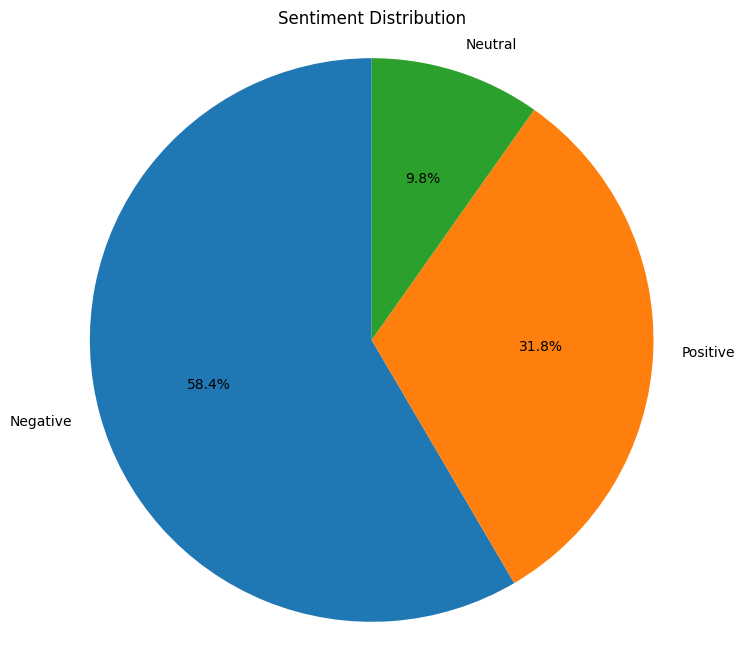

In [ ]:
# visualisasi persebaran data pada kolom sentiment pada dataset df_final_cleaned menggunakan pie chart

import matplotlib.pyplot as plt

# Assuming df_final_cleaned is already defined as in your provided code
sentiment_counts = df_final_cleaned['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
#handling class imbalance pada kolom sentiment menggunakan undersampling kelas mayoritas

# X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# from imblearn.under_sampling import RandomUnderSampler

# # Separate features (X) and target variable (y)
# X = df_final_cleaned.drop('Sentiment', axis=1)
# y = df_final_cleaned['Sentiment']

# # Initialize RandomUnderSampler
# rus = RandomUnderSampler(random_state=42)  # You can change the random_state

# # Resample the data
# X_resampled, y_resampled = rus.fit_resample(X, y)

# # Create a new balanced DataFrame
# df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

# # Now df_balanced contains the undersampled data
# print(df_balanced['Sentiment'].value_counts())


NameError: name 'smote_enn' is not defined

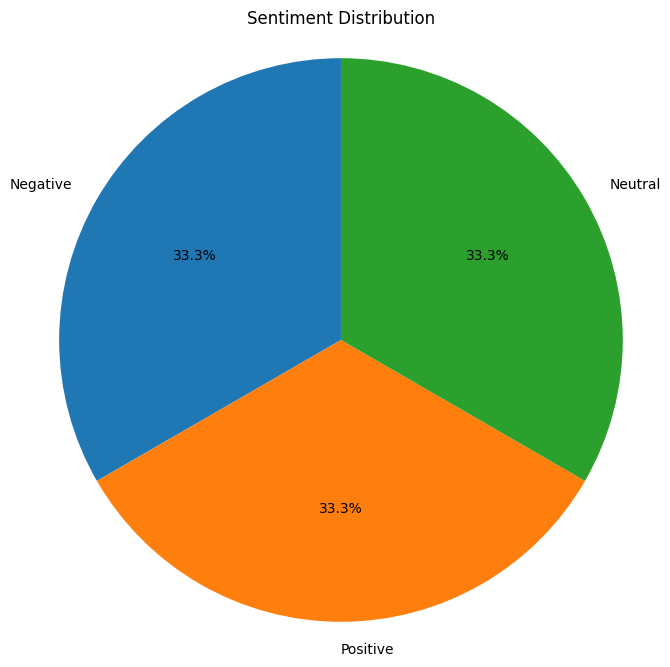

In [ ]:
#visualisasi persebaran data pada kolom sentiment pada dataset df_resampled menggunakan pie chart

import matplotlib.pyplot as plt

# Assuming df_resampled is already defined as in your provided code
sentiment_counts = df_resampled['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [2593, 4546]

<Figure size 800x600 with 0 Axes>

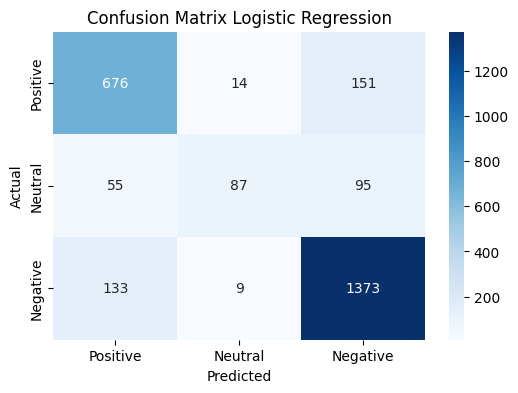

              precision    recall  f1-score   support

    Negative       0.85      0.91      0.88      1515
     Neutral       0.79      0.37      0.50       237
    Positive       0.78      0.80      0.79       841

    accuracy                           0.82      2593
   macro avg       0.81      0.69      0.72      2593
weighted avg       0.82      0.82      0.81      2593



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns


# Asumsi dataset df_final_cleaned memiliki teks bersih yang bisa digunakan untuk training
X = df_final_cleaned['translated_text']  # Fitur: teks bersih
y = df_final_cleaned['Sentiment']  # Gunakan label dari VADER sebagai target sementara

# Ubah teks menjadi vektor TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Split data menjadi train-test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Latih model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi di test set
y_pred = model.predict(X_test)

# Evaluasi model dengan confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


Distribusi Sentimen Setelah SMOTEENN:
Sentiment
Neutral     7562
Positive    7557
Negative    7553
Name: count, dtype: int64


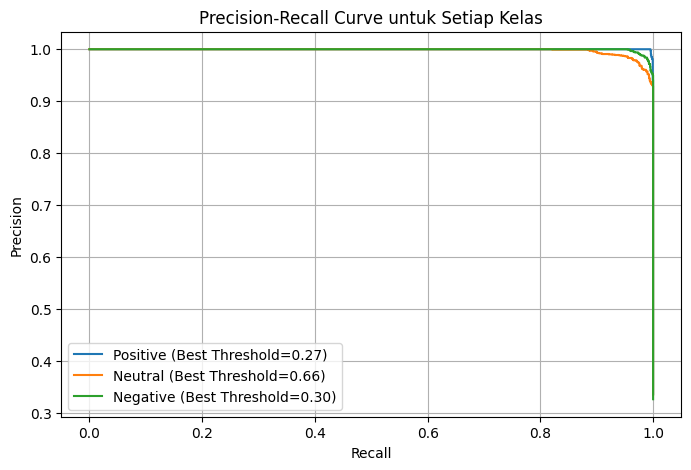


Confusion Matrix dengan Threshold Optimal:
[[   0   23 1460]
 [  20 1478   24]
 [1523    7    0]]

Classification Report dengan Threshold Optimal:
              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00      1483
     Neutral       0.98      0.97      0.98      1522
    Negative       0.00      0.00      0.00      1530

    accuracy                           0.33      4535
   macro avg       0.33      0.32      0.33      4535
weighted avg       0.33      0.33      0.33      4535



In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# === [1] Pisahkan Features (X) dan Target (y) ===
X = df_final_cleaned.drop('Sentiment', axis=1)  # Hapus kolom target dari fitur
y = df_final_cleaned['Sentiment']  # Ambil target variabel

# === [2] Hapus Kolom yang Tidak Bisa Diproses SMOTEENN (String, URL, dsb.) ===
X = X.select_dtypes(include=['number'])  # Ambil hanya kolom numerik

# === [3] Terapkan SMOTEENN untuk Menyeimbangkan Data ===
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# === [4] Buat DataFrame Seimbang ===
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Sentiment'] = y_resampled  # Tambahkan kembali label

# === [5] Cek Distribusi Kelas Setelah Balancing ===
print("Distribusi Sentimen Setelah SMOTEENN:")
print(df_balanced['Sentiment'].value_counts())

# === [6] Split Data ke Train-Test Set ===
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# === [7] Train Model Logistic Regression ===
model = LogisticRegression()
model.fit(X_train, y_train)

# === [8] Dapatkan Probabilitas Prediksi ===
y_probs = model.predict_proba(X_test)

# === [9] Cari Threshold Optimal Menggunakan Precision-Recall Curve ===
optimal_thresholds = {}

plt.figure(figsize=(8, 5))

for i, class_label in enumerate(['Positive', 'Neutral', 'Negative']):
    precision, recall, thresholds = precision_recall_curve(pd.get_dummies(y_test).iloc[:, i], y_probs[:, i])

    # Hitung F1-score untuk setiap threshold
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

    # Temukan threshold dengan F1-score tertinggi
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    optimal_thresholds[class_label] = best_threshold

    # Plot Precision-Recall Curve
    plt.plot(recall, precision, label=f"{class_label} (Best Threshold={best_threshold:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve untuk Setiap Kelas")
plt.legend()
plt.grid()
plt.show()

# === [10] Terapkan Threshold Optimal dalam Prediksi ===
y_pred_adjusted = np.zeros_like(y_probs)

for i, class_label in enumerate(['Positive', 'Neutral', 'Negative']):
    y_pred_adjusted[:, i] = (y_probs[:, i] >= optimal_thresholds[class_label]).astype(int)

# Konversi ke Label Kelas
y_pred_final = np.argmax(y_pred_adjusted, axis=1)

# === [11] Pastikan Label Konsisten untuk Evaluasi ===
label_mapping = {label: idx for idx, label in enumerate(['Positive', 'Neutral', 'Negative'])}
y_test_mapped = y_test.map(label_mapping)  # Konversi y_test ke format numerik agar sesuai dengan y_pred_final

# === [12] Evaluasi Model dengan Confusion Matrix & Classification Report ===

print("\nConfusion Matrix dengan Threshold Optimal:")
print(confusion_matrix(y_test_mapped, y_pred_final))

print("\nClassification Report dengan Threshold Optimal:")
print(classification_report(y_test_mapped, y_pred_final, target_names=['Positive', 'Neutral', 'Negative']))


Unique values in y_test_mapped: [0 1 2]
Unique values in y_pred_final: [0 1 2]


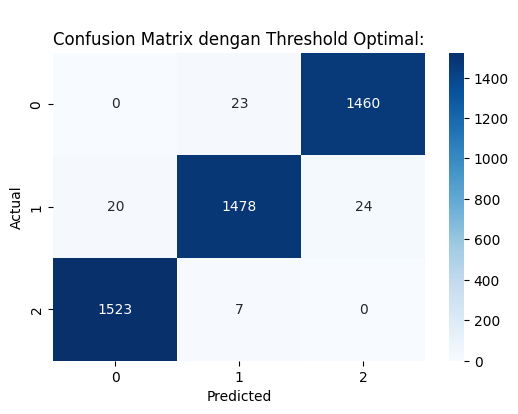

In [ ]:
print("Unique values in y_test_mapped:", np.unique(y_test_mapped))
print("Unique values in y_pred_final:", np.unique(y_pred_final))

available_labels = np.unique(y_test_mapped)  # Ambil hanya label yang ada
cm = confusion_matrix(y_test_mapped, y_pred_final, labels=available_labels)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=available_labels,
            yticklabels=available_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("\nConfusion Matrix dengan Threshold Optimal:")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns


# Asumsi dataset df_resampled memiliki teks bersih yang bisa digunakan untuk training
X = df_resampled['translated_text']  # Fitur: teks bersih
y = df_resampled['Sentiment']  # Gunakan label dari VADER sebagai target sementara

# Ubah teks menjadi vektor TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Split data menjadi train-test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Latih model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi di test set
y_pred = model.predict(X_test)

# Evaluasi model dengan confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


NameError: name 'df_resampled' is not defined

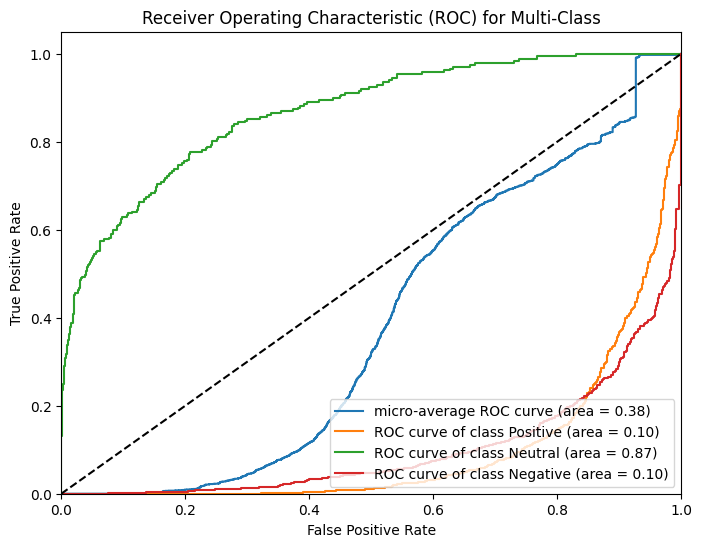

In [ ]:
#evaluasi juga model dengan metode ROC Model Pertama

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Binarize the output
y_test_bin = label_binarize(y_test, classes=['Positive', 'Neutral', 'Negative'])
n_classes = y_test_bin.shape[1]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(model)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for the multiclass problem
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(['Positive', 'Neutral', 'Negative'][i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class')
plt.legend(loc="lower right")
plt.show()


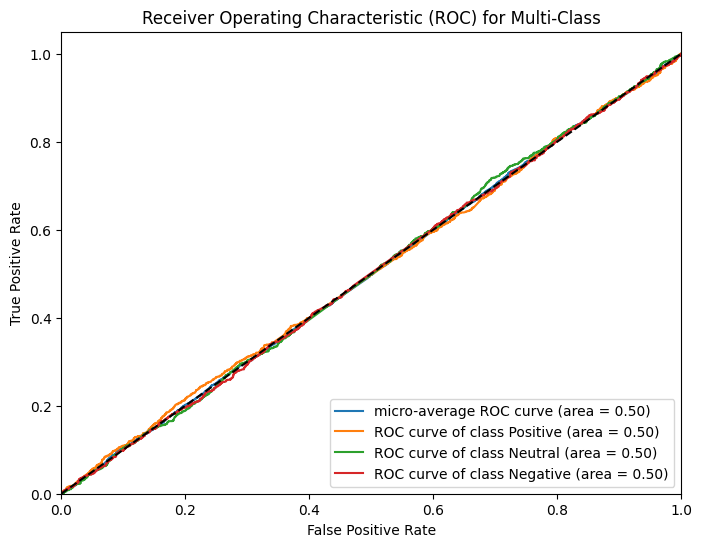

In [ ]:
# evaluasi juga model dengan metode ROC Model Pertama

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Binarize the output
y_test_bin = label_binarize(y_test, classes=['Positive', 'Neutral', 'Negative'])
n_classes = y_test_bin.shape[1]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(model)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for the multiclass problem
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(['Positive', 'Neutral', 'Negative'][i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# # tes model menggunakan data baru

# # Prediksi sentimen pada teks baru
# new_text = ["i am happy right now"]

# # Praproses teks baru (pastikan langkah-langkah prapemrosesan sama dengan yang digunakan pada data pelatihan)
# new_text_processed = []
# for text in new_text:
#     text = remove_pattern(text, "@[\w]*")
#     text = remove(text)
#     text = clean_tweets(text)
#     text = remove_stopwords(text)
#     text = remove_punct(text)
#     new_text_processed.append(" ".join(text)) # Gabungkan kembali kata-kata menjadi kalimat

# # Ubah teks baru menjadi vektor TF-IDF
# new_text_tfidf = vectorizer.transform(new_text_processed)

# # Lakukan prediksi
# new_prediction = model.predict(new_text_tfidf)
# print(new_prediction)

# # Cetak hasil prediksi
# print(f"Teks: {new_text}")
# print(f"Sentimen yang diprediksi: {new_prediction[0]}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 5000 features, but LogisticRegression is expecting 4 features as input.